In [96]:
!pip3 install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/43/2bd63467490036697e7be71444fafc7b236923d614d4521979a200c6b559/matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://download.pytorch.org/whl/cpu/torch-1.7.0%2Bcpu-cp36-cp36m-linux_x86_64.whl
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.8.1%2Bcpu-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3f/23/6b54106b3de029d3f10cf8debc302491c17630357449c900d6209665b302/torchaudio-0.7.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b6/c0/442d9d87e0da00bf856ef6dd4916f84a2d710b5f1a367d42d7f3c4e99a6c/Pillow-

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
dataset=MNIST(root='data/', download=True)

In [ ]:
len(dataset) #60000

In [7]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F12A89BA0F0>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


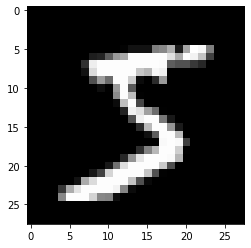

In [13]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 2


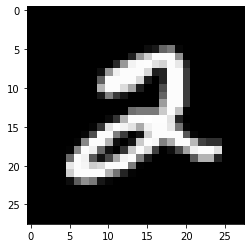

In [14]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [15]:
import torchvision.transforms as transforms

In [16]:
dataset=MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [17]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [18]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [20]:
import torch.nn as nn
input_size = 28*28
class_count = 10
model = nn.Linear(input_size, class_count)

In [23]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [25]:
images.shape

torch.Size([128, 1, 28, 28])

In [27]:
images.reshape(128, 784)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [26]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
#     out=model(images)
#     print(out)
    break

tensor([1, 6, 8, 5, 7, 4, 2, 0, 3, 2, 6, 6, 3, 9, 0, 4, 8, 6, 4, 7, 3, 4, 3, 9,
        6, 4, 6, 1, 9, 2, 8, 3, 6, 2, 0, 0, 4, 1, 5, 7, 8, 8, 4, 0, 2, 9, 2, 1,
        2, 0, 9, 7, 7, 5, 1, 4, 0, 6, 9, 9, 6, 7, 9, 5, 9, 8, 7, 3, 4, 6, 1, 0,
        2, 3, 8, 3, 9, 3, 0, 3, 4, 9, 0, 7, 1, 3, 8, 3, 8, 9, 0, 5, 4, 1, 5, 3,
        0, 2, 9, 5, 4, 8, 1, 9, 7, 4, 8, 8, 5, 1, 0, 6, 3, 6, 5, 9, 9, 8, 5, 3,
        6, 1, 5, 7, 3, 2, 1, 3])
torch.Size([128, 1, 28, 28])


In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size, class_count)
        
    def forward(self, xb):
        xb=xb.reshape(-1, 784)
        out=self.linear(xb)
        return out

In [29]:
model=MnistModel()

In [30]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [31]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [34]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0269, -0.0128,  0.0062,  ..., -0.0162, -0.0061,  0.0188],
         [ 0.0045, -0.0048,  0.0171,  ..., -0.0036,  0.0124,  0.0135],
         [-0.0057,  0.0114, -0.0313,  ..., -0.0024,  0.0108, -0.0072],
         ...,
         [-0.0136,  0.0148, -0.0010,  ...,  0.0281, -0.0174,  0.0184],
         [-0.0190, -0.0178, -0.0173,  ...,  0.0039, -0.0032,  0.0085],
         [-0.0096,  0.0132,  0.0341,  ...,  0.0239,  0.0144,  0.0193]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0195,  0.0229, -0.0245,  0.0223, -0.0108,  0.0047, -0.0019,  0.0346,
          0.0320,  0.0153], requires_grad=True)]

In [36]:
for images, labels in train_loader:
    print(images.shape)
    out=model(images)
    break
    
print(out.shape)
print(out[:1].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([[ 0.4222,  0.2077, -0.5613,  0.0477, -0.1330, -0.1189, -0.0196,  0.2977,
          0.4918, -0.0134]])


In [37]:
import torch.nn.functional as F

In [42]:
probs=F.softmax(out, dim=1)

print(probs[:1])

torch.sum(probs[0])

tensor([[0.1376, 0.1110, 0.0514, 0.0946, 0.0790, 0.0801, 0.0884, 0.1215, 0.1475,
         0.0890]], grad_fn=<SliceBackward>)


tensor(1.0000, grad_fn=<SumBackward0>)

In [45]:
max_probs, preds=torch.max(probs, dim=1)
preds, max_probs

(tensor([8, 0, 3, 3, 5, 8, 6, 7, 0, 6, 7, 6, 0, 8, 8, 7, 7, 6, 7, 0, 9, 9, 0, 0,
         8, 0, 7, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 6, 8, 0, 0, 3, 0, 5, 8, 8, 0, 0,
         0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 6, 8, 8, 7, 0, 0, 5, 8, 0, 0, 0,
         9, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 9, 0, 0, 0, 7, 6, 8,
         7, 0, 0, 0, 0, 0, 0, 6, 7, 0, 7, 0, 8, 0, 0, 0, 0, 0, 7, 7, 0, 7, 6, 8,
         0, 0, 0, 0, 7, 0, 4, 0]),
 tensor([0.1475, 0.1605, 0.1385, 0.1424, 0.1213, 0.1273, 0.1145, 0.1241, 0.1213,
         0.1240, 0.1579, 0.1265, 0.1394, 0.1254, 0.1361, 0.1469, 0.1558, 0.1412,
         0.1268, 0.1333, 0.1141, 0.1120, 0.1722, 0.1195, 0.1406, 0.1471, 0.1323,
         0.1229, 0.1335, 0.1272, 0.1302, 0.1214, 0.1610, 0.1353, 0.1547, 0.1467,
         0.1606, 0.1462, 0.1626, 0.1473, 0.1277, 0.1211, 0.1511, 0.1378, 0.1342,
         0.1171, 0.1321, 0.1621, 0.1429, 0.1253, 0.1265, 0.1527, 0.1328, 0.1496,
         0.1440, 0.1329, 0.1286, 0.1879, 0.1426, 0.1372, 0.1555, 0.1285, 0

In [47]:
torch.sum(preds==labels)

tensor(10)

In [48]:
def accuracy(out, labels):
    _, preds=torch.max(out, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [49]:
accuracy(out, labels)

tensor(0.0781)

In [51]:
loss_fn=F.cross_entropy

In [52]:
loss=loss_fn(out, labels)
print(loss)

tensor(2.2706, grad_fn=<NllLossBackward>)


In [64]:
def fit(epochs, lr, model, train_loader, val_loader, opt_fn=torch.optim.SGD):
    optimizer=opt_fn(model.parameters(), lr)
    hist=[]
    
    for epoch in range(epochs):
        
        #train
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        #validation
        res=evaluate(model, val_loader)
        model.epoch_end(epoch, res)
        hist.append(res)
        
    return hist

In [65]:
def evaluate(model, val_loader):
    out=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(out)

In [66]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size, class_count)
        
    def forward(self, xb):
        xb=xb.reshape(-1, 784)
        out=self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels=batch
        out=self(images)
        loss=F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels=batch
        out=self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, out):
        batch_losses=[x['val_loss'] for x in out]
        epoch_loss=torch.stack(batch_losses).mean()
        batch_accs=[x['val_acc'] for x in out]
        epoch_acc=torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss={:.4f}, val_acc={:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [67]:
model=MnistModel()

In [68]:
temp_res=evaluate(model, val_loader)
temp_res

{'val_loss': 2.2803595066070557, 'val_acc': 0.1292523741722107}

In [69]:
#lets start training -- Tachodril

In [70]:
history1=fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss=1.9250, val_acc=0.6559
Epoch [1], val_loss=1.6632, val_acc=0.7496
Epoch [2], val_loss=1.4672, val_acc=0.7753
Epoch [3], val_loss=1.3189, val_acc=0.7895
Epoch [4], val_loss=1.2045, val_acc=0.8001


In [71]:
history2=fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss=1.1144, val_acc=0.8078
Epoch [1], val_loss=1.0420, val_acc=0.8156
Epoch [2], val_loss=0.9828, val_acc=0.8200
Epoch [3], val_loss=0.9334, val_acc=0.8251
Epoch [4], val_loss=0.8917, val_acc=0.8296


In [72]:
history3=fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss=0.8559, val_acc=0.8328
Epoch [1], val_loss=0.8249, val_acc=0.8362
Epoch [2], val_loss=0.7978, val_acc=0.8389
Epoch [3], val_loss=0.7739, val_acc=0.8409
Epoch [4], val_loss=0.7525, val_acc=0.8429


In [73]:
history4=fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss=0.7334, val_acc=0.8450
Epoch [1], val_loss=0.7161, val_acc=0.8467
Epoch [2], val_loss=0.7005, val_acc=0.8480
Epoch [3], val_loss=0.6862, val_acc=0.8495
Epoch [4], val_loss=0.6731, val_acc=0.8500


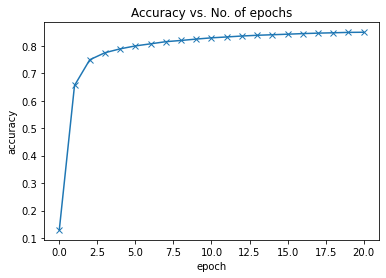

In [75]:
history = [temp_res] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [77]:
len(test_dataset)

10000

In [78]:
test_dataset=MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [79]:
def predict(img, model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _, preds=torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


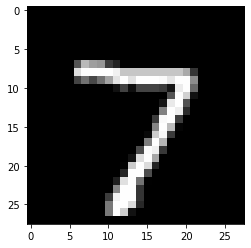

In [81]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict(img, model))

Label: 9 , Predicted: 4


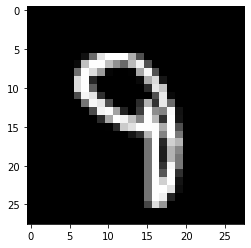

In [82]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict(img, model))

In [83]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6383494138717651, 'val_acc': 0.862011730670929}

In [84]:
#saving the optimized params

In [85]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [87]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0003, -0.0008,  0.0105,  ..., -0.0105, -0.0260, -0.0097],
                      [-0.0228, -0.0017, -0.0249,  ...,  0.0163, -0.0218, -0.0305],
                      [-0.0229,  0.0350,  0.0352,  ..., -0.0185, -0.0299,  0.0151],
                      ...,
                      [-0.0180,  0.0040, -0.0020,  ...,  0.0066, -0.0199,  0.0206],
                      [ 0.0356, -0.0184, -0.0064,  ..., -0.0233,  0.0241,  0.0308],
                      [ 0.0038, -0.0322,  0.0130,  ..., -0.0206,  0.0326, -0.0145]])),
             ('linear.bias',
              tensor([-0.0347,  0.1247,  0.0007, -0.0327, -0.0072,  0.0334,  0.0075,  0.0790,
                      -0.0774, -0.0066]))])

In [88]:
#now we can use these saved params whenever we want

In [89]:
model2=MnistModel()

In [90]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 3.0056e-02,  2.0741e-02,  3.5359e-02,  ..., -2.0228e-02,
                       -1.9681e-02,  9.8092e-06],
                      [ 1.1388e-02, -5.4602e-03, -2.3688e-02,  ...,  2.5086e-02,
                        2.5104e-02,  1.8774e-02],
                      [-2.1550e-02, -2.4194e-02,  2.8121e-02,  ..., -1.2725e-02,
                        3.4927e-02, -2.3121e-03],
                      ...,
                      [ 3.6482e-03,  3.0359e-02, -3.2806e-02,  ...,  1.4404e-03,
                       -3.4127e-02,  1.9138e-02],
                      [ 2.7804e-02,  1.1926e-03,  6.9708e-03,  ...,  3.2402e-02,
                       -9.1007e-03,  7.6497e-03],
                      [-3.2070e-02, -2.3190e-02, -1.9174e-02,  ..., -2.3658e-02,
                       -1.2698e-02, -1.7233e-02]])),
             ('linear.bias',
              tensor([ 0.0012, -0.0236,  0.0321,  0.0282,  0.0134, -0.0005, -0.0322, -0.0307,
                      -0.0222,

In [91]:
evaluate(model2, test_loader)

{'val_loss': 2.2857038974761963, 'val_acc': 0.14199218153953552}

In [92]:
#now load saved params of prev model to model2
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0003, -0.0008,  0.0105,  ..., -0.0105, -0.0260, -0.0097],
                      [-0.0228, -0.0017, -0.0249,  ...,  0.0163, -0.0218, -0.0305],
                      [-0.0229,  0.0350,  0.0352,  ..., -0.0185, -0.0299,  0.0151],
                      ...,
                      [-0.0180,  0.0040, -0.0020,  ...,  0.0066, -0.0199,  0.0206],
                      [ 0.0356, -0.0184, -0.0064,  ..., -0.0233,  0.0241,  0.0308],
                      [ 0.0038, -0.0322,  0.0130,  ..., -0.0206,  0.0326, -0.0145]])),
             ('linear.bias',
              tensor([-0.0347,  0.1247,  0.0007, -0.0327, -0.0072,  0.0334,  0.0075,  0.0790,
                      -0.0774, -0.0066]))])

In [93]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6383494138717651, 'val_acc': 0.862011730670929}

In [95]:
# this gave the optimized accuracy, as expected
# level of quality -- Tachodril